In [1]:
from utils import crop_roi, plot_image_grid
from dataloaders import create_dataloaders
import numpy as np
import torch

In [2]:
train_loader, val_loader, test_loader = create_dataloaders(limit=10)

/Users/dov/Library/Mobile Documents/com~apple~CloudDocs/dovsync/Documenti Universita/Advanced Machine Learning/AML Project.nosync/melanoma-detection/dataloaders.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metadata['label'] = labels_encoded
/Users/dov/Library/Mobile Documents/com~apple~CloudDocs/dovsync/Documenti Universita/Advanced Machine Learning/AML Project.nosync/melanoma-detection/dataloaders.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metadata['augmented'] = False


6
3
0 Index([0, 1, 4], dtype='int64')
1 Index([2, 3, 5], dtype='int64')
2 Index([6, 6, 6], dtype='int64')


Loading train images: 9it [00:00, 99.34it/s]
/Users/dov/Library/Mobile Documents/com~apple~CloudDocs/dovsync/Documenti Universita/Advanced Machine Learning/AML Project.nosync/melanoma-detection/dataloaders.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metadata['label'] = labels_encoded
/Users/dov/Library/Mobile Documents/com~apple~CloudDocs/dovsync/Documenti Universita/Advanced Machine Learning/AML Project.nosync/melanoma-detection/dataloaders.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

tensor([[[0.5709]],

        [[0.5753]],

        [[0.5802]]])
tensor([[[0.1986]],

        [[0.1949]],

        [[0.1907]]])
Len stack: 9
Loading complete, some files (0) were not found: []
6
3
0 Index([0, 2, 5], dtype='int64')
1 Index([1, 4, 6], dtype='int64')
2 Index([3, 3, 3], dtype='int64')


Loading train images: 9it [00:00, 122.48it/s]


tensor([[[0.5680]],

        [[0.5785]],

        [[0.5893]]])


/Users/dov/Library/Mobile Documents/com~apple~CloudDocs/dovsync/Documenti Universita/Advanced Machine Learning/AML Project.nosync/melanoma-detection/dataloaders.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metadata['label'] = labels_encoded
/Users/dov/Library/Mobile Documents/com~apple~CloudDocs/dovsync/Documenti Universita/Advanced Machine Learning/AML Project.nosync/melanoma-detection/dataloaders.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metadata['augmented'] = False


tensor([[[0.1961]],

        [[0.1842]],

        [[0.1708]]])
Len stack: 9
Loading complete, some files (0) were not found: []


Loading test images: 10it [00:00, 148.30it/s]

tensor([[[0.6365]],

        [[0.6366]],

        [[0.6362]]])
tensor([[[0.1565]],

        [[0.1569]],

        [[0.1579]]])
Len stack: 10
Loading complete, some files (0) were not found: []


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import cv2
from PIL import Image


def plot_image_grid(inp: torch.Tensor, title=None):
    """Imshow for Tensor."""
    inp = torchvision.utils.make_grid(inp)
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# def crop_roi(images: torch.Tensor) -> torch.Tensor:

#     print(f"Images shape is {images.shape}")

#     # Assuming 'image_tensor' is your input image represented as a tensor
#     # Convert tensor to NumPy array
#     batch_images = np.array([image_tensor.permute(1,2,0).numpy()
#                             for image_tensor in images])
#     transform = torchvision.transforms.Compose([
#         torchvision.transforms.Resize((224,224)), 
#         torchvision.transforms.ToTensor()])
    
#     # Process each image in the batch
#     cropped_images = []
#     for image_array in batch_images:
#         # Convert image to grayscale if it's a color image
#         image_gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
#         image_gray = (image_gray * 255).astype(np.uint8)


#         # Threshold the image to separate the item from the background
#         _, thresholded = cv2.threshold(image_gray, 1, 255, cv2.THRESH_BINARY)

#         # Find contours in the thresholded image
#         contours, _ = cv2.findContours(
#             thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         print(f"Contours are {thresholded.shape}")

#         if len(contours) == 0:
#             print("No contours found")
#             cropped_images.append(torch.from_numpy(image_array).permute(2,0,1))
#             continue
#         # Find the contour with the maximum area (assuming it corresponds to the item)
#         max_contour = max(contours, key=cv2.contourArea)

#         # Get the bounding box of the contour
#         x, y, w, h = cv2.boundingRect(max_contour)

#         # Crop the image using the bounding box
#         cropped_image = image_array[y:y + h, x:x + w]
#         cropped_image = (cropped_image).astype(np.uint8)
#         cropped_image = Image.fromarray(cropped_image)
       
#         cropped_image = transform(cropped_image)
#         cropped_images.append(cropped_image)


#     # Convert the list of cropped images back to a NumPy array
#     cropped_images = torch.stack(cropped_images, dim=0)
#     return cropped_images
def crop_roi(images: torch.Tensor) -> torch.Tensor:
    batch_images = np.array([image_tensor.permute(1, 2, 0).numpy()
                            for image_tensor in images])
    transform = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),
                                                torchvision.transforms.ToTensor()])

    cropped_images = []
    for image_array in batch_images:
        # Convert image to grayscale
        image_gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

        # plot_image_grid(torch.from_numpy(image_gray))

        ret, thresh = cv2.threshold(image_gray, 0, 1, cv2.THRESH_BINARY)

        # plot_image_grid(torch.from_numpy(thresh.astype(np.uint8)))


        # Find contours in the edge image
        contours, _ = cv2.findContours(
            thresh.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # If there are no contours, save the image as it is
        if len(contours) == 0:
            print(f"No contours found")
            cropped_images.append(torch.from_numpy(
                image_array).permute(2, 0, 1))
            continue

        # Find the contour with the maximum area (assuming it corresponds to the item)
        max_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(max_contour)

        # Crop the image using the bounding box
        cropped_image = image_array[y:y + h, x:x + w]
        cropped_image = Image.fromarray((cropped_image * 255).astype(np.uint8))
        cropped_image = transform(cropped_image)
        cropped_images.append(cropped_image)

    cropped_images = torch.stack(cropped_images, dim=0)
    return cropped_images

Images shape is torch.Size([9, 3, 224, 224])
Max and min values in croppped image are 0.6352941393852234 and 0.0
Max and min values in croppped image are 0.7686274647712708 and 0.0
Max and min values in croppped image are 0.8666666746139526 and 0.0
Max and min values in croppped image are 0.886274516582489 and 0.0
Max and min values in croppped image are 0.7843137383460999 and 0.0
Max and min values in croppped image are 0.8666666746139526 and 0.0
Max and min values in croppped image are 0.8666666746139526 and 0.0
Max and min values in croppped image are 0.7019608020782471 and 0.0
Max and min values in croppped image are 0.8078431487083435 and 0.0


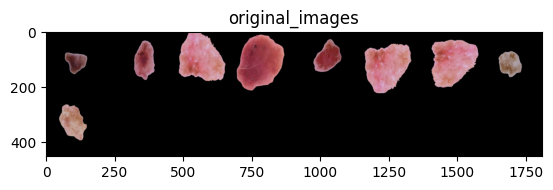

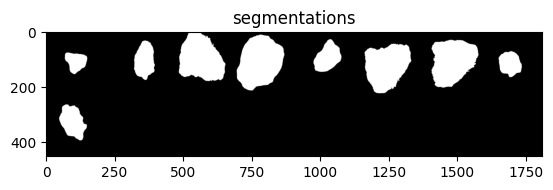

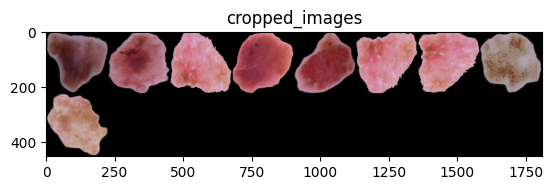

In [87]:
for tr_i, (tr_images, tr_labels, segmentations) in enumerate(train_loader):
    tr_images = torch.mul(tr_images, segmentations)
    print(f"Images shape is {tr_images.shape}")
    cropped_images = crop_roi(tr_images)
    plot_image_grid(tr_images, "original_images")
    plot_image_grid(segmentations, "segmentations")
    plot_image_grid(cropped_images, "cropped_images")